In [1]:
from plants_sm.data_structures.dataset.single_input_dataset import SingleInputDataset

dataset = SingleInputDataset.from_csv("../../final_data/test_300.csv", representation_field="sequence", instances_ids_field="accession", labels_field=slice(8, 2779))

/home/jcapela/PlantsSM/src/plants_sm/io/csv.py:56: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(self.path, **self.kwargs)


In [2]:
from plants_sm.data_standardization.truncation import Truncator
dataset = Truncator(max_length=800).fit_transform(dataset)

Truncator: 100%|██████████| 300/300 [00:00<00:00, 42826.70it/s]


In [1]:
from plants_sm.models.ec_number_prediction.esm import EC_ESM_Lightning

model = EC_ESM_Lightning("esm2_t12_35M_UR50D", [2560, 5120], 2771)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/jcapela/miniforge3/envs/plants_sm/lib/python3.9/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [13]:
from plants_sm.featurization.proteins.bio_embeddings.constants import ESM_LAYERS


layers_1 = ESM_LAYERS["esm2_t12_35M_UR50D"] - 1
layer_2 = ESM_LAYERS["esm2_t12_35M_UR50D"] - 2
no_grad = set()
for parameter in model.named_parameters():
    if "layers" in parameter[0] and str(layers_1) not in parameter[0] and str(layer_2) not in parameter[0]:
        no_grad.add(parameter[0])
no_grad

{'esm_model.layers.0.fc1.bias',
 'esm_model.layers.0.fc1.weight',
 'esm_model.layers.0.fc2.bias',
 'esm_model.layers.0.fc2.weight',
 'esm_model.layers.0.final_layer_norm.bias',
 'esm_model.layers.0.final_layer_norm.weight',
 'esm_model.layers.0.self_attn.k_proj.bias',
 'esm_model.layers.0.self_attn.k_proj.weight',
 'esm_model.layers.0.self_attn.out_proj.bias',
 'esm_model.layers.0.self_attn.out_proj.weight',
 'esm_model.layers.0.self_attn.q_proj.bias',
 'esm_model.layers.0.self_attn.q_proj.weight',
 'esm_model.layers.0.self_attn.v_proj.bias',
 'esm_model.layers.0.self_attn.v_proj.weight',
 'esm_model.layers.0.self_attn_layer_norm.bias',
 'esm_model.layers.0.self_attn_layer_norm.weight',
 'esm_model.layers.1.fc1.bias',
 'esm_model.layers.1.fc1.weight',
 'esm_model.layers.1.fc2.bias',
 'esm_model.layers.1.fc2.weight',
 'esm_model.layers.1.final_layer_norm.bias',
 'esm_model.layers.1.final_layer_norm.weight',
 'esm_model.layers.1.self_attn.k_proj.bias',
 'esm_model.layers.1.self_attn.k_pr

In [12]:
for parameter in model.named_parameters():
    print(parameter[0])

esm_model.embed_tokens.weight
esm_model.layers.0.self_attn.k_proj.weight
esm_model.layers.0.self_attn.k_proj.bias
esm_model.layers.0.self_attn.v_proj.weight
esm_model.layers.0.self_attn.v_proj.bias
esm_model.layers.0.self_attn.q_proj.weight
esm_model.layers.0.self_attn.q_proj.bias
esm_model.layers.0.self_attn.out_proj.weight
esm_model.layers.0.self_attn.out_proj.bias
esm_model.layers.0.self_attn_layer_norm.weight
esm_model.layers.0.self_attn_layer_norm.bias
esm_model.layers.0.fc1.weight
esm_model.layers.0.fc1.bias
esm_model.layers.0.fc2.weight
esm_model.layers.0.fc2.bias
esm_model.layers.0.final_layer_norm.weight
esm_model.layers.0.final_layer_norm.bias
esm_model.layers.1.self_attn.k_proj.weight
esm_model.layers.1.self_attn.k_proj.bias
esm_model.layers.1.self_attn.v_proj.weight
esm_model.layers.1.self_attn.v_proj.bias
esm_model.layers.1.self_attn.q_proj.weight
esm_model.layers.1.self_attn.q_proj.bias
esm_model.layers.1.self_attn.out_proj.weight
esm_model.layers.1.self_attn.out_proj.bia

In [4]:
from plants_sm.models.language_pytorch_models import EC_ESM1bLightningModel

model_l = EC_ESM1bLightningModel(model, max_epochs=2, devices=[1, 2], batch_size=2, strategy="ddp_notebook",
                               accelerator="gpu")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
tokens = model_l.preprocess(dataset)

In [6]:
tokens

In [2]:
from plants_sm.pathway_prediction.reaction_rules_reactor import ReactionRulesReactor

reactor = ReactionRulesReactor()
compound = "C[C@H]1[C@H]2[C@H](C[C@@H]3[C@@]2(CC[C@H]4[C@H]3CC[C@@H]5[C@@]4(CC[C@@H](C5)O[C@H]6[C@@H]([C@H]([C@H]([C@H](O6)CO)O[C@H]7[C@@H]([C@H]([C@@H]([C@H](O7)CO)O)O[C@H]8[C@@H]([C@H]([C@@H](CO8)O)O)O)O[C@H]9[C@@H]([C@H]([C@@H]([C@H](O9)CO)O)O)O)O)O)C)C)O[C@]11[C@H](C[C@@H](CN1)CO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)CO)O)O)O)OC(=O)C"
reactor.react([compound])

Predicting reactions: 100%|██████████| 14618/14618 [01:43<00:00, 141.18it/s]


[ReactionSolution(score=2.9986951583116563, reactants=[Molecule(representation=Smiles(representation='CC(=O)O[C@H]1C[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)CN[C@@]12O[C@H]1C[C@H]3[C@@H]4CC[C@H]5C[C@@H](O[C@@H]6O[C@H](CO)[C@H](O[C@@H]7O[C@H](CO)[C@@H](O)[C@H](O[C@@H]8OC[C@@H](O)[C@H](O)[C@H]8O)[C@H]7O[C@@H]7O[C@H](CO)[C@@H](O)[C@H](O)[C@H]7O)[C@H](O)[C@H]6O)CC[C@]5(C)[C@H]4CC[C@]3(C)[C@H]1[C@@H]2C', mol=<rdkit.Chem.rdchem.Mol object at 0x7f63e4354c80>), smiles='CC(=O)O[C@H]1C[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)CN[C@@]12O[C@H]1C[C@H]3[C@@H]4CC[C@H]5C[C@@H](O[C@@H]6O[C@H](CO)[C@H](O[C@@H]7O[C@H](CO)[C@@H](O)[C@H](O[C@@H]8OC[C@@H](O)[C@H](O)[C@H]8O)[C@H]7O[C@@H]7O[C@H](CO)[C@@H](O)[C@H](O)[C@H]7O)[C@H](O)[C@H]6O)CC[C@]5(C)[C@H]4CC[C@]3(C)[C@H]1[C@@H]2C', substrate=None, cofactor=None, mol=<rdkit.Chem.rdchem.Mol object at 0x7f63e4354c80>)], products=[Molecule(representation=Smiles(representation='CC(=O)O[C@H]1C[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)CN[C@@]

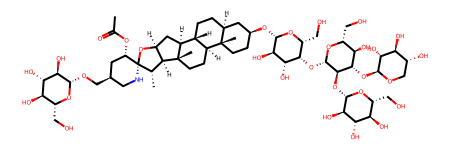

In [2]:
reactor.solutions[1].reactants[0].mol

In [1]:
reactor.solutions[4].score

NameError: name 'reactor' is not defined

In [24]:
filtered_solutions = [solution for solution in reactor.solutions if solution.score <= 0]
len(filtered_solutions)

606

In [26]:
filtered_solutions[90].ec_numbers

['2.4.1.166']